In [4]:
import numpy as np
import keras
from keras import callbacks
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot as plt
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix
import tensorflow as tf
%matplotlib inline

In [11]:
class TimeSeriesData:
    
    def __init__(self, num_points, xmin, xmax):
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (xmax-xmin)/num_points
        self.x_data = np.linspace(xmin, xmax, num_points)
        self.y_true = np.sin(self.x_data)
    
    def ret_true(self, x_series):
        return np.sin(x_series)
    
    def next_batch(self, batch_size, steps, return_batch_ts=False):
        
        rand_start = np.random.rand(batch_size, 1)
        
        ts_start = rand_start * (self.xmax - self.xmin - (steps*self.resolution))
        
        batch_ts = ts_start + np.arange(0.0, steps+1) * self.resolution
        
        y_batch = np.sin(batch_ts)
        
        if return_batch_ts:
            return y_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1), batch_ts
        else:
            return y_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1)    

In [12]:
ts_data = TimeSeriesData(250, 0, 10)

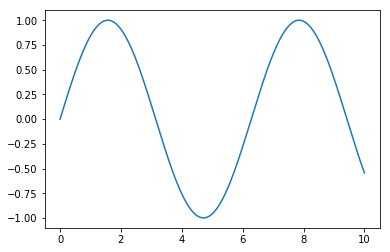

In [14]:
plt.plot(ts_data.x_data, ts_data.y_true)

In [15]:
num_time_steps = 30

In [17]:
y1,y2,ts = ts_data.next_batch(1, num_time_steps, True)

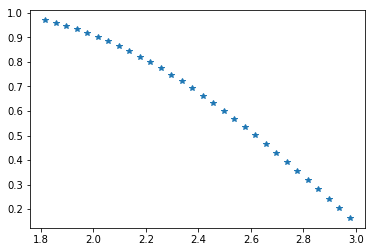

In [19]:
plt.plot(ts.flatten()[1:], y2.flatten(), '*')

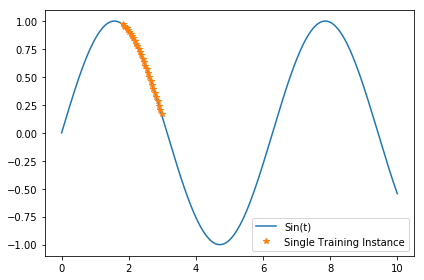

In [21]:
plt.plot(ts_data.x_data, ts_data.y_true, label='Sin(t)')
plt.plot(ts.flatten()[1:], y2.flatten(), '*', label='Single Training Instance')

plt.legend()
plt.tight_layout()

In [22]:
#TRAINING DATA

In [23]:
train_inst = np.linspace(5, 5 + ts_data.resolution*(num_time_steps+1),num_time_steps+1)

In [24]:
train_inst

array([5.        , 5.04133333, 5.08266667, 5.124     , 5.16533333,
       5.20666667, 5.248     , 5.28933333, 5.33066667, 5.372     ,
       5.41333333, 5.45466667, 5.496     , 5.53733333, 5.57866667,
       5.62      , 5.66133333, 5.70266667, 5.744     , 5.78533333,
       5.82666667, 5.868     , 5.90933333, 5.95066667, 5.992     ,
       6.03333333, 6.07466667, 6.116     , 6.15733333, 6.19866667,
       6.24      ])

In [ ]:
plt.title()

In [25]:
#CREATE MODEL

In [26]:
tf.reset_default_graph()

In [27]:
num_inputs = 1

In [28]:
num_neurons = 100

In [29]:
num_outputs = 1

In [30]:
learning_rate = 0.0001

In [31]:
num_train_iteration = 2000

In [32]:
batch_size = 1

In [33]:
#PLACEHOLDERs

In [34]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [ ]:
cell = tf.contrib.rnn.